# Introdução

## Equipa
<ul>
    <li>Gonçalo Oliveira - 18559
    <li>André Reis - 26012
    <li>Diogo Gonçalves - 26021
</ul>

## Contexto do Projeto
O projeto tem como objetivo explorar e compreender os fatores que influenciam o ambiente urbano e o mercado imobiliário de Boston, utilizando dados quantitativos sobre características da região.

## Objetivos
<ol>
    <li> Classificação Supervisionada
    <ul>
        <li> Objetivo: Prever a proximidade ao Rio Charles (chas) usando as variáveis disponíveis.
        <li> Explicação: Determinar quais fatores (como criminalidade, poluição ou acessibilidade) são mais indicativos da proximidade ao Rio.
    </ul>
    <li> Agrupamento com K-Means
    <ul>
        <li> Objetivo: Agrupar regiões com base em características como criminalidade (crim), acessibilidade (rad) e idade das construções (age).
        <li> Explicação: Identificar padrões com características semelhantes para direcionar políticas públicas, como segurança ou infraestrutura.
    </ul>
    <li> Regras de Associação (Apriori)
    <ul>
        <li> Objetivo: Descobrir associações entre alta criminalidade (crim), poluição (nox) e acessibilidade (rad).
        <li> Explicação: Detectar relações entre variáveis que podem impactar na qualidade de vida ou no valor das propriedades de uma região.
    </ul>
</ol>

# Conjunto de dados

## Dataset utilizado
O dataset utilizado foi obtido no seguinte website: https://www.kaggle.com/datasets/arunjangir245/boston-housing-dataset/data?select=BostonHousing.csv

## Explicação colunas
<ul>
    <li>crim: Taxa de criminalidade per capita por cidade.
    <li>zn: Proporção de grandes lotes residenciais (acima de 25.000 pés quadrados).
    <li>indus: Proporção de terrenos comerciais e industriais  por cidade.
    <li>chas: Variável binária que indica se o imóvel fica próximo ao Rio Charles (1 para sim, 0 para não).
    <li>nox: Concentração de óxidos de nitrogênio no ar.
    <li>rm: Número médio de divisões por habitação.
    <li>age: proporção de unidades antigas ocupadas pelos proprietários construídas antes de 1940.
    <li>dis: Distâncias média até os centros de emprego de Boston.
    <li>rad: Índice de acessibilidade às auto-estradas.
    <li>tax: Taxa de imposto sobre a propriedade por $10.000.
</ul>


## Dataset Metadata

| Coluna   | Tipo de Dado |
| -------- | ------------ |
| crim     | float        |
| zn       | float        |
| indus    | float        |
| chas     | int          |
| nox      | float        |
| rm       | float        |
| age      | float        |
| dis      | float        |
| rad      | int          |
| tax      | int          |


## Configuração Inicial

In [81]:
# Import required libraries

# linear algebra and data processing libraries
import pandas as pd
import numpy as np

# Graphics Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Utils
from collections import Counter


data_path = ("BostonHousing.csv")
data = pd.read_csv(data_path)

pd.DataFrame(data)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Remoção de Colunas
O dataset nao era explicito quanto a certas colunas, para não sermos induzidos a erro decidimos remover as colunas (ptration, b, lstat, medv)

In [82]:
data_trimmed = data.iloc[:, :-4]
pd.DataFrame(data_trimmed)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273


## Verificação de valores nulos

In [83]:
data_trimmed.isna().sum()

crim     0
zn       0
indus    0
chas     0
nox      0
rm       5
age      0
dis      0
rad      0
tax      0
dtype: int64

Existem 5 valores nulos na coluna __rn__

## Visualização e Remoção das linhas com valores nulos

In [84]:
# Filtrar e exibir as linhas onde 'rm' é nulo
null_rows = data_trimmed[data_trimmed['rm'].isnull()]

# Exibir as linhas com valores nulos
print(null_rows)

# Remover linhas onde a coluna 'rm' é nula
data_cleaned = data_trimmed.dropna(subset=['rm'])

# Verificar se há valores nulos restantes na coluna 'rm'
print("\nValores nulos em 'rm' após limpeza:", data_cleaned['rm'].isnull().sum())

null_rows_after_clean = data_cleaned[data_cleaned['rm'].isnull()]
print(null_rows_after_clean)

        crim    zn  indus  chas    nox  rm   age     dis  rad  tax
10   0.22489  12.5   7.87     0  0.524 NaN  94.3  6.3467    5  311
35   0.06417   0.0   5.96     0  0.499 NaN  68.2  3.3603    5  279
63   0.12650  25.0   5.13     0  0.453 NaN  43.4  7.9809    8  284
96   0.11504   0.0   2.89     0  0.445 NaN  69.6  3.4952    2  276
135  0.55778   0.0  21.89     0  0.624 NaN  98.2  2.1107    4  437

Valores nulos em 'rm' após limpeza: 0
Empty DataFrame
Columns: [crim, zn, indus, chas, nox, rm, age, dis, rad, tax]
Index: []


Podemos verificar as 5 linhas onde existem valores nulos, de seguida podemos verificar que as mesmas foram removidas

## Verificação de valores Duplicados

In [85]:
data_cleaned.duplicated().sum()

np.int64(0)

Não existem valores duplicados

## Verificação de Valores Negativos

In [86]:
negativos = data_cleaned[data_cleaned < 0].any()
print(negativos)

crim     False
zn       False
indus    False
chas     False
nox      False
rm       False
age      False
dis      False
rad      False
tax      False
dtype: bool


Podemos verificar que não existem valores negativos

## Identificar e Remover Outlier

In [87]:
# Função para encontrar outliers
def detect_outliers(df, features):
    outlier_indices = []  # Para armazenar os índices dos outliers
    outlier_columns = {}  # Para rastrear colunas responsáveis

    for c in features:
        # 1º quartil
        Q1 = np.percentile(df[c], 25)
        # 3º quartil
        Q3 = np.percentile(df[c], 75)
        # IQR
        IQR = Q3 - Q1
        # Limite para outliers
        outlier_step = IQR * 1.5
        # Detecta os índices de outliers
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        print(f"Coluna: {c}, Limite Inferior: {Q1 - outlier_step}, Limite Superior: {Q3 + outlier_step}")
        # Armazena os índices
        outlier_indices.extend(outlier_list_col)

        # Armazena as colunas responsáveis
        for index in outlier_list_col:
            if index not in outlier_columns:
                outlier_columns[index] = []
            outlier_columns[index].append(c)


    # Contabiliza outliers que aparecem em mais de 2 variáveis
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers, outlier_columns

# Selecionar apenas as colunas mantidas
features_to_check = ["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax"]

# Identificar outliers
outliers, outlier_columns = detect_outliers(data_cleaned, features_to_check)

# Exibir os índices dos outliers detectados
print("\nOutliers detectados:\n", outliers)
print(data_cleaned.loc[outliers])
for index in outliers:
    print(f"\nOutlier no índice {index}: colunas {outlier_columns[index]}\n")

# Remover outliers do dataset
data_cleaned = data_cleaned.drop(outliers, axis=0).reset_index(drop=True)

print(f"Linha {outliers} removida.")


Coluna: crim, Limite Inferior: -5.33469, Limite Superior: 9.10979
Coluna: zn, Limite Inferior: -18.75, Limite Superior: 31.25
Coluna: indus, Limite Inferior: -14.175, Limite Superior: 37.465
Coluna: chas, Limite Inferior: 0.0, Limite Superior: 0.0
Coluna: nox, Limite Inferior: 0.18650000000000005, Limite Superior: 0.8865
Coluna: rm, Limite Inferior: 4.772500000000001, Limite Superior: 7.7364999999999995
Coluna: age, Limite Inferior: -28.5, Limite Superior: 167.5
Coluna: dis, Limite Inferior: -2.4565000000000006, Limite Superior: 9.662700000000001
Coluna: rad, Limite Inferior: -26.0, Limite Superior: 54.0
Coluna: tax, Limite Inferior: -301.5, Limite Superior: 1246.5

Outliers detectados:
 [283]
        crim    zn  indus  chas    nox     rm   age    dis  rad  tax
283  0.01501  90.0   1.21     1  0.401  7.923  24.8  5.885    1  198

Outlier no índice 283: colunas ['zn', 'chas', 'rm']

Linha [283] removida.


1 outlier foi detectado e removido.

# Vizualização

## Correlação entre Variáveis

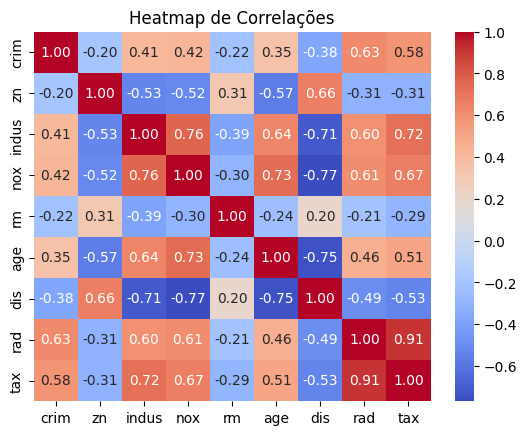

In [88]:
# 1. **Correlação entre variáveis**
list1 = ["crim", "zn", "indus", "nox", "rm", "age", "dis", "rad", "tax"]
sns.heatmap(data[list1].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap de Correlações")
plt.show()


## Diagrama de Caixa (chas vs nox)

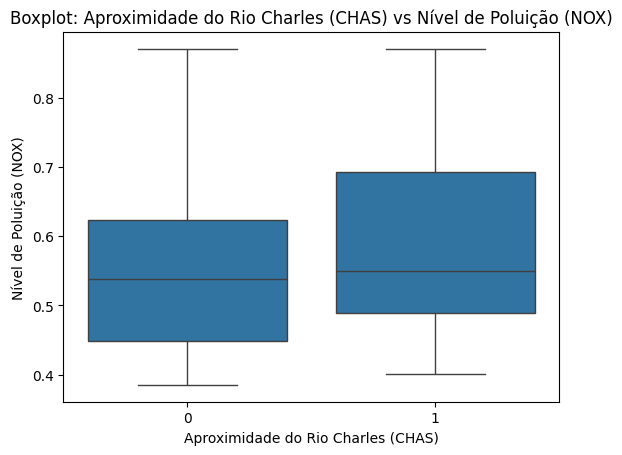

In [89]:
# 2. **Boxplot: Aproximidade do Rio Charles  (chas) vs. Classe Acessibilidade (nox)**
sns.boxplot(x="chas", y="nox", data=data)
plt.title("Boxplot: Aproximidade do Rio Charles (CHAS) vs Nível de Poluição (NOX)")
plt.xlabel("Aproximidade do Rio Charles (CHAS)")
plt.ylabel("Nível de Poluição (NOX)")
plt.show()